# O and Fe Opacity for Solar Metallicity Gas

Figure 4.2 from Chapter 4 of *Stellar Structure & Evolution Pinsonneault & Ryden*, Cambridge University Press.

Contributions to opacity as a function of photon energy for oxygen and iron in gas of solar
abundance with T=2.1×10<sup>6</sup> K and $\rho$=0.06g cm<sup>−3</sup>.

Models calculated by Dr. Franck Delahaye, LERMA - Observatoire de Paris., Site de Meudon

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [2]:
plotFile = 'Fig4_2.png' 

# graphic aspect ratio = width/height

aspect = 2.4
#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data

Data are photon energy in eV and kappa in units of $a_0^2/{\rm atom}$, where $a_0$ is the Bohr radius.
We need to convert this into cgs units of cm<sup>2</sup>g<sup>-1</sup>. 

This is involved but instructive.

### Units Conversion

We use the [NIST CODATA 2018](https://physics.nist.gov/cgi-bin/cuu/Value?bohrrada0|search_for=atomnuc!) value of the Bohr radius of $a_0=5.29177210903\times10^{-9}\,{\rm cm}$.

The calculations used the Grevesse & Sauval [1998, SSR, 85, 161](https://ui.adsabs.harvard.edu/abs/1998SSRv...85..161G/) standard solar composition:
 * hydrogen: X = 0.7333
 * helium: Y = 0.2497
 * <sup>16</sup>O: X<sub>16</sub> = 0.007932
 * <sup>56</sup>Fe: X<sub>56</sub> = 0.001299
 * all metals: Z = 0.0170

This means we need separate conversions for <sup>16</sup>O and <sup>56</sup>Fe.

An opacity of 1$a_0^2/{\rm atom}$ = $2.800285205\times10^{-17}$cm<sup>2</sup>/atom.
...



In [3]:
# Bohr Radius (NIST CODATA2018)

a0 = 5.29177210903e-9 # cm
a02 = a0**2

# atomic mass unit (NIST CODATA2018)

amu = 1.66053906660e-24 # g

# Oxygen

X16 = 0.007932

cgsO = X16*a02/(16*amu)
print(f'1 a0^2/atom of 16O = {cgsO:.2f} cm^2/g of gas')

# Iron

X56 = 0.001299

cgsFe = X56*a02/(56*amu)
print(f'1 a0^2/atom of 56Fe = {cgsFe:.2f} cm^2/g of gas')

# Peak of the Rosseland weighting function

k = 8.617333262e-5 # ev/K
T = 2.1e6 # K
rwPeak = 3.83*k*T

print(f'Rosseland weighting function peak: E={rwPeak:.1f}eV')

1 a0^2/atom of 16O = 8360.19 cm^2/g of gas
1 a0^2/atom of 56Fe = 391.18 cm^2/g of gas
Rosseland weighting function peak: E=693.1eV


### Read in the data

Read in the data from the individual files and put in dictionaries of lists by atom (O and Fe) and opacity 
mechanism:
 * tot = total opacity
 * bf = bound-free opacity
 * ff = free-free opacity
 * bb = bound-free opacity

We have data for oxygen and iron. Individual files are in the `Kappa/` folder that should accompany this
notebook.

In [4]:
dataDir = './Kappa'

listO = ['tot','bf','ff']
listFe = ['tot','bf','ff']
ltype = {'tot':'-','bf':'-','ff':'--'}
color = {'tot':'black','bf':'gray','ff':'black'}
label = {'tot':'f-f+b-f+b-b','bf':'f-f+b-f','ff':'f-f'}
order = {'tot':10,'bf':8,'ff':6}

Ephot = {}
kappa = {}

# Oxygen

for mech in listO:
    key = f'O_{mech}'
    kappaFile = f'{dataDir}/kappa_O_{mech}.txt'
    data = pd.read_csv(kappaFile,sep=r'\s+',comment='#')
    Ephot[key] = np.array(data['E_photon'])
    kappa[key] = cgsO * np.array(data['kappa'])

for mech in listFe:
    key = f'Fe_{mech}'
    kappaFile = f'{dataDir}/kappa_Fe_{mech}.txt'
    data = pd.read_csv(kappaFile,sep=r'\s+',comment='#')
    Ephot[key] = np.array(data['E_photon'])
    kappa[key] = cgsFe * np.array(data['kappa'])

# limits

minE = 0.0    # eV
maxE = 2000.0

minK = 5e-4 # cm^2/g
maxK = 2e4

## Make the Plot

2-panel side-by-side plot, O then Fe.

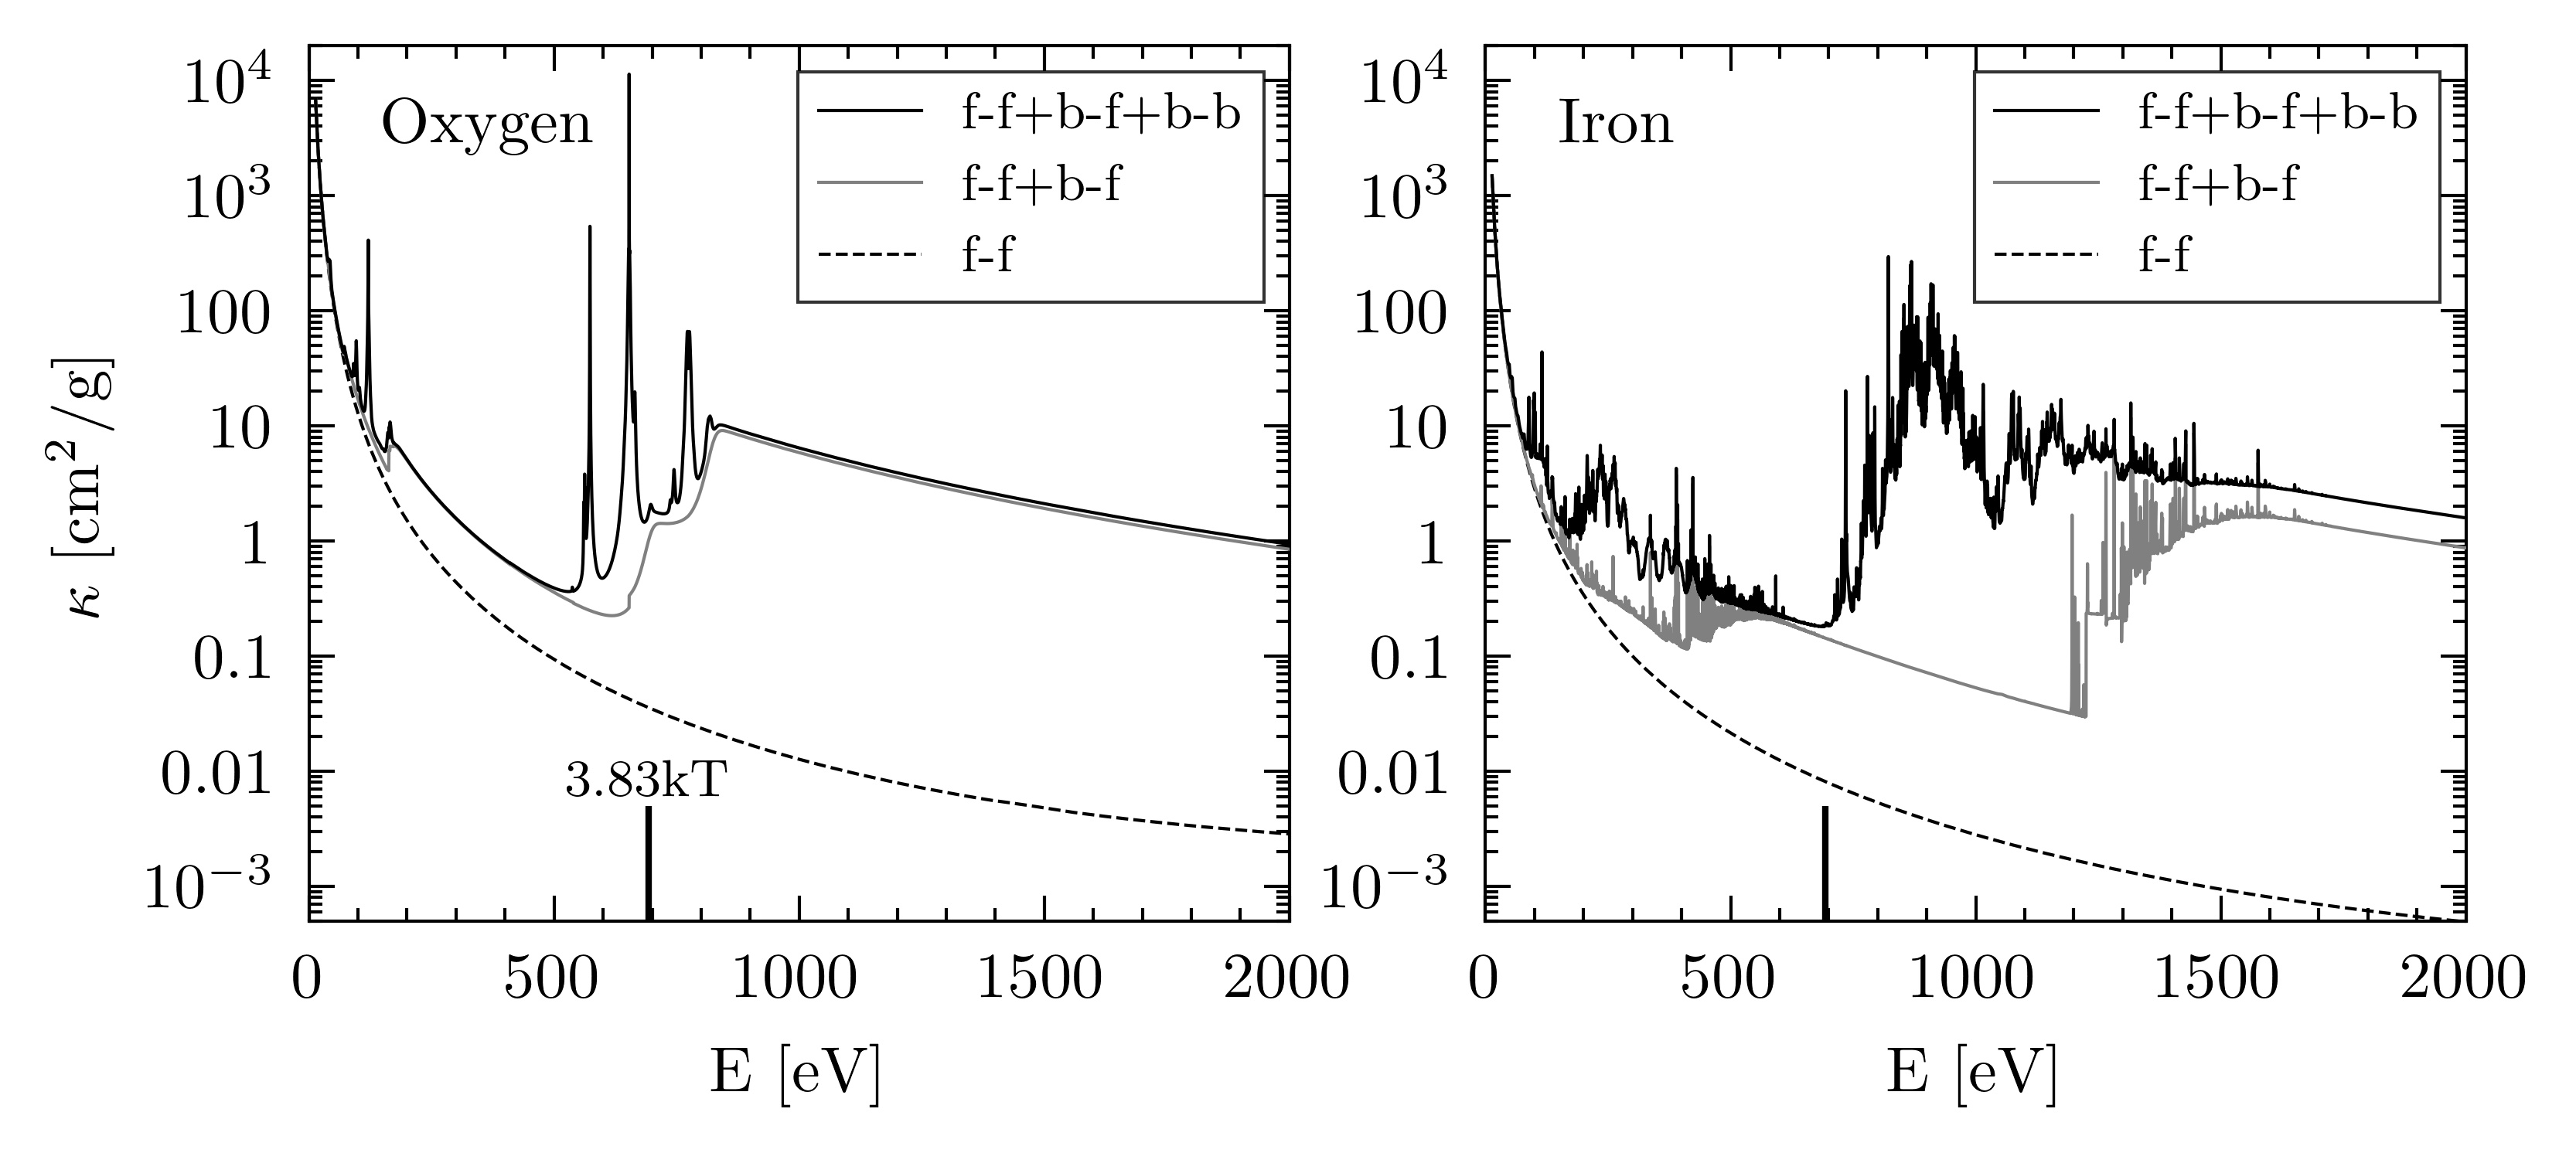

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.2, hspace=0)

# Common Y-axis log scale

yticks = [1e-3,0.01,0.1,1,10,100,1e3,1e4]
yticklab = [r'10$^{-3}$','0.01','0.1','1','10','100',r'10$^{3}$',r'10$^{4}$']

# Left Panel: Oxygen opacity

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(minE,maxE)
ax1.set_xlabel(r'E [eV]',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_minor_locator(MultipleLocator(100))
ax1.set_ylim(minK,maxK)
ax1.set_ylabel(r'$\kappa$ [cm$^2$/g]',fontsize=axisFontSize)
ax1.set_yscale('log')
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklab)
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))

for mech in listO:
    key = f'O_{mech}'
    ax1.plot(Ephot[key],kappa[key],ls=ltype[mech],lw=0.5,color=color[mech],label=label[mech],zorder=order[mech])

ax1.text(150,4000,'Oxygen',fontsize=axisFontSize,ha='left',va='center')

legend1 = ax1.legend(fontsize=8,loc='upper right',fancybox=False,edgecolor='black')# bbox_to_anchor=(0.1,0.01))
frame1 = legend1.get_frame()
frame1.set_linewidth(0.5)

# Right Panel: Iron opacity

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(minE,maxE)
ax2.set_xlabel(r'E [eV]',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(500))
ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.set_ylim(minK,maxK)
ax2.set_yscale('log')
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklab)
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))

for mech in listFe:
    key = f'Fe_{mech}'
    ax2.plot(Ephot[key],kappa[key],ls=ltype[mech],lw=0.5,color=color[mech],label=label[mech],zorder=order[mech])

ax2.text(150,4000,'Iron',fontsize=axisFontSize,ha='left',va='center')

legend2 = ax2.legend(fontsize=8,loc='upper right',fancybox=False,edgecolor='black') # ,bbox_to_anchor=(0.1,0.01))
frame2 = legend2.get_frame()
frame2.set_linewidth(0.5)

# Mark the Rosseland weighting function peak energy

ax1.vlines(rwPeak,minK,0.005,ls=['-'],lw=1,color='black')
ax1.text(rwPeak,0.005,'3.83kT',va='bottom',ha='center',fontsize=8)

ax2.vlines(rwPeak,minK,0.005,ls=['-'],lw=1,color='black')

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')